In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
cluster_2016 = pd.read_csv('cluster_data1.csv')
population_16 = pd.read_csv('population_16.csv')

### Features use for the dataset

* VEHICLE_TYPE	
* START_RENTAL_ZONE	
* END_RENTAL_ZONE	
* CITY_RENTAL_ZONE
* TECHNICAL_INCOME_CHANNEL
* Ride_Duration
* Month

#### All categorical variables are converted to integer value by either encoding or with their ids

In [126]:
cluster_2016.head(5)

,VEHICLE_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,108647,Überseering/Mexikoring,213687.0,Bebelallee/Meenkwiese,213855.0,Hamburg,Android,28.800000,1
1,108371,Stadthausbrücke / Neuer Wall,138379.0,Goldbekplatz / Semperstraße,140796.0,Hamburg,iPhone,27.050000,1
2,119829,Jungfernstieg / Ballindamm,131879.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Hamburg,iPhone,11.216667,1
3,116810,Hudtwalckerstraße / Bebelallee,138378.0,Kellinghusenstraße / Loogeplatz,140795.0,Hamburg,others,75.383333,1
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Hamburg,Android,8.983333,1


In [127]:
#df_city = pd.get_dummies(cluster_2016['CITY_RENTAL_ZONE'])

In [128]:
#cluster_2016["CITY_RENTAL_ZONE"] = cluster_2016["CITY_RENTAL_ZONE"].astype('category')
#cluster_2016["TECHNICAL_INCOME_CHANNEL"] = cluster_2016["TECHNICAL_INCOME_CHANNEL"].cat.codes

#### Changing CITY_RENTAL_ZONE and TECHNICAL_INCOME_CHANNEL to category and then apply dummy encoding for converting them to integer value

In [130]:
cluster_2016['CITY_RENTAL_ZONE']=cluster_2016['CITY_RENTAL_ZONE'].astype('category').cat.codes
cluster_2016['TECHNICAL_INCOME_CHANNEL']=cluster_2016['TECHNICAL_INCOME_CHANNEL'].astype('category').cat.codes
cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE', 'END_RENTAL_ZONE'])

In [131]:
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,108647,213687.0,213855.0,18,0,28.800000,1
1,108371,138379.0,140796.0,18,4,27.050000,1
2,119829,131879.0,131873.0,18,4,11.216667,1
3,116810,138378.0,140795.0,18,5,75.383333,1
4,120345,131883.0,244093.0,18,0,8.983333,1


In [132]:
#x = cluster_2016.reset_index().values

* Here we apply **K-modes** algorithm as this dataset have both categorical value and numerical values.

In [133]:
import numpy as np
from kmodes.kmodes import KModes

# making cluster size to 4 
km = KModes(n_clusters=4, init='Huang', n_init=3, verbose=1)

# Predict only for 2016 year dataset
clusters = km.fit_predict(cluster_2016)

cluster_2016['clusters'] = clusters

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 402418, cost: 31007135.0
Run 1, iteration: 2/100, moves: 0, cost: 31007135.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1011275, cost: 31326156.0
Run 2, iteration: 2/100, moves: 371, cost: 31326156.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2025577, cost: 30926832.0
Run 3, iteration: 2/100, moves: 304299, cost: 30910773.0
Run 3, iteration: 3/100, moves: 24636, cost: 30910773.0
Best run was number 3
[[1.18996000e+05 1.98077000e+05 1.98077000e+05 1.80000000e+01
  0.00000000e+00 5.31666667e+00 7.00000000e+00]
 [1.10322000e+05 1.40804000e+05 1.31648000e+05 1.80000000e+01
  4.00000000e+00 4.90000000e+00 9.00000000e+00]
 [1.19699000e+05 1.31646000e+05 2.11706000e+05 1.80000000e+01
  4.00000000e+00 7.61666667e+00 8.00000000e+00]
 [1.20074000e+05

#### For Visuaisation we apply PCA to decomposes all the features to two features and representing it in X and Y axis.

In [141]:
from sklearn.decomposition import PCA
pca = PCA(2)
# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(cluster_2016.loc[:,:])
plot_columns.shape

(5702575, 2)

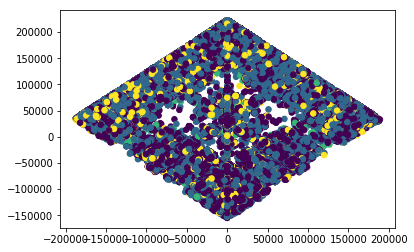

In [142]:
# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=cluster_2016["clusters"], s=30)
plt.show()

## applying different visualisation between different features with clusters

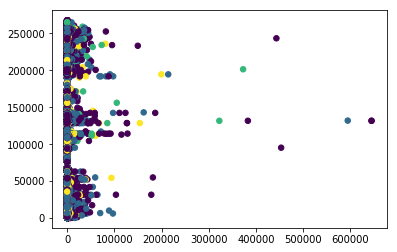

In [174]:
# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=cluster_2016.as_matrix()[:,5], y=cluster_2016.as_matrix()[:,1], c=cluster_2016["clusters"], s=30)
plt.show()

In [160]:
cluster_2016.as_matrix()[:,0]

array([108647., 108371., 119829., ..., 108102., 119256., 120518.])

### Result of the the dataset with cluster label.

In [165]:
cluster_2016.head(100)

,VEHICLE_HAL_ID,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,clusters
0,108647,213687.0,213855.0,18,0,28.800000,1,0
1,108371,138379.0,140796.0,18,4,27.050000,1,1
2,119829,131879.0,131873.0,18,4,11.216667,1,1
3,116810,138378.0,140795.0,18,5,75.383333,1,0
4,120345,131883.0,244093.0,18,0,8.983333,1,0
5,117442,204812.0,204815.0,26,0,11.116667,1,0
6,107059,128496.0,246251.0,8,4,15.050000,1,1
7,107059,246251.0,244936.0,8,4,10.666667,1,1
8,119362,158204.0,244936.0,18,4,17.466667,1,1
9,109225,131883.0,244093.0,18,2,8.866667,1,3


### Cluster-0 labeled dataset

In [167]:
cluster_2016[cluster_2016['clusters'] == 0].head(100)

,VEHICLE_HAL_ID,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,clusters
0,108647,213687.0,213855.0,18,0,28.800000,1,0
3,116810,138378.0,140795.0,18,5,75.383333,1,0
4,120345,131883.0,244093.0,18,0,8.983333,1,0
5,117442,204812.0,204815.0,26,0,11.116667,1,0
10,120164,198077.0,244093.0,18,5,8.516667,1,0
11,120164,137994.0,137994.0,18,5,0.500000,1,0
15,106158,233820.0,244983.0,33,0,16.183333,1,0
16,115674,138378.0,131642.0,18,0,22.700000,1,0
17,143623,138382.0,213235.0,18,5,5.600000,1,0
20,115695,203890.0,203890.0,18,5,94.483333,1,0


### Cluster-1 labeled dataset

In [168]:
cluster_2016[cluster_2016['clusters'] == 1].head(100)

,VEHICLE_HAL_ID,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,clusters
1,108371,138379.0,140796.0,18,4,27.050000,1,1
2,119829,131879.0,131873.0,18,4,11.216667,1,1
6,107059,128496.0,246251.0,8,4,15.050000,1,1
7,107059,246251.0,244936.0,8,4,10.666667,1,1
8,119362,158204.0,244936.0,18,4,17.466667,1,1
12,163886,214452.0,28824.0,12,4,10.950000,1,1
14,120400,140800.0,224650.0,18,4,10.333333,1,1
19,120083,199402.0,245452.0,18,4,37.400000,1,1
25,108205,204799.0,204792.0,26,4,7.316667,1,1
28,120573,252485.0,131648.0,18,5,23.116667,1,1


### Cluster-2 labeled dataset

In [169]:
clu`ster_2016[cluster_2016['clusters'] == 2].head(100)

,VEHICLE_HAL_ID,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,clusters
87,117209,131646.0,131902.0,33,4,8.800000,1,2
88,120478,131646.0,131902.0,18,4,5.566667,1,2
302,116890,131646.0,139501.0,18,2,26.533333,1,2
436,143614,131641.0,211706.0,18,5,13.200000,1,2
460,120064,211706.0,211706.0,18,4,0.633333,1,2
493,119321,201324.0,211706.0,18,5,17.716667,1,2
527,120004,131649.0,211706.0,18,5,9.433333,1,2
616,143686,243617.0,211706.0,18,5,4.116667,1,2
687,109355,201328.0,211706.0,18,5,32.783333,1,2
811,143641,138387.0,211706.0,18,5,19.366667,1,2


### Cluster-3 labeled dataset

In [170]:
cluster_2016[cluster_2016['clusters'] == 3].head(100)

,VEHICLE_HAL_ID,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,clusters
9,109225,131883.0,244093.0,18,2,8.866667,1,3
13,108894,140795.0,131641.0,18,2,31.216667,1,3
18,119637,214170.0,131883.0,18,2,17.716667,1,3
21,116390,233823.0,241976.0,33,2,17.016667,1,3
22,106272,135647.0,135647.0,12,2,19.766667,1,3
26,108065,204823.0,204819.0,26,2,15.433333,1,3
29,143717,131640.0,211709.0,18,2,21.916667,1,3
33,113543,62971.0,62980.0,40,2,11.183333,1,3
39,117158,204797.0,204819.0,26,2,15.700000,1,3
57,108032,204822.0,204810.0,26,2,16.116667,1,3


### concatinating population dataset with 2016 bike share dataset

In [3]:
area_dict = dict(zip(population_16.CITY_RENTAL_ZONE, population_16.Population16))

In [4]:
new_cluster_2016 = pd.read_csv('cluster_data1.csv')
new_cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,108647,Überseering/Mexikoring,213687.0,Bebelallee/Meenkwiese,213855.0,Hamburg,Android,28.800000,1
1,108371,Stadthausbrücke / Neuer Wall,138379.0,Goldbekplatz / Semperstraße,140796.0,Hamburg,iPhone,27.050000,1
2,119829,Jungfernstieg / Ballindamm,131879.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Hamburg,iPhone,11.216667,1
3,116810,Hudtwalckerstraße / Bebelallee,138378.0,Kellinghusenstraße / Loogeplatz,140795.0,Hamburg,others,75.383333,1
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Hamburg,Android,8.983333,1


In [5]:
new_cluster_2016['population'] = new_cluster_2016['CITY_RENTAL_ZONE']
new_cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,population
0,108647,Überseering/Mexikoring,213687.0,Bebelallee/Meenkwiese,213855.0,Hamburg,Android,28.800000,1,Hamburg
1,108371,Stadthausbrücke / Neuer Wall,138379.0,Goldbekplatz / Semperstraße,140796.0,Hamburg,iPhone,27.050000,1,Hamburg
2,119829,Jungfernstieg / Ballindamm,131879.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Hamburg,iPhone,11.216667,1,Hamburg
3,116810,Hudtwalckerstraße / Bebelallee,138378.0,Kellinghusenstraße / Loogeplatz,140795.0,Hamburg,others,75.383333,1,Hamburg
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Hamburg,Android,8.983333,1,Hamburg


In [8]:
new_cluster_2016 = new_cluster_2016.replace({"population": area_dict})

#### Some cities poplation are missing

In [9]:
new_cluster_2016['population'].unique()

array(['18,10,438', '1,99,062', '1,57,437', '7,36,414', 'Marburg',
       '35,74,830', '6,28,032', '10,75,935', '14,64,301', '2,77,619',
       'Rüsselsheim', 'Weimar', '3,04,781', '3,09,999', '3,22,125',
       'Halle', '2,16,712', 'Baden-Baden', 'Bamberg', 'Göttingen',
       'Flugh. Frankfurt', '2,11,382', 'Freiburg', '2,47,441', '1,26,010',
       '1,10,238', '6,13,230', 'Fulda', 'Troisdorf', 'Oldenburg (Oldb)',
       '1,59,914', 'Warnemünde', 'Gütersloh', '5,65,719', '2,13,528',
       'Saarbrücken', 'Hannover', 'Aschaffenburg', '2,07,513', 'Hanau',
       '1,33,639', '2,48,667', '2,38,136', 'Kaiserslautern', '3,33,451',
       'Hennef'], dtype=object)

In [14]:
#final = pd.concat([cluster_2016,population_16],axis=1, copy=False)
#result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
#final.head()
#final = final.dropna(axis=0, how='any')